# Figure 8 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Load global-mean time-mean surface temperature and precipitation

In [2]:
ts_aqct = np.array(np.load('./postdata_npz/ts_aquaControlTRACMIP.fldmean.timmean.npz')['ts'])
ts_aq4x = np.array(np.load('./postdata_npz/ts_aqua4xCO2TRACMIP.fldmean.timmean.npz'  )['ts'])
ts_ldct = np.array(np.load('./postdata_npz/ts_landControlTRACMIP.fldmean.timmean.npz')['ts'])
ts_ld4x = np.array(np.load('./postdata_npz/ts_land4xCO2TRACMIP.fldmean.timmean.npz'  )['ts'])
ts_ldor = np.array(np.load('./postdata_npz/ts_landOrbitTRACMIP.fldmean.timmean.npz'  )['ts'])

In [3]:
pr_aqct = 86400*np.array(np.load('./postdata_npz/pr_aquaControlTRACMIP.fldmean.timmean.npz')['pr'])
pr_aq4x = 86400*np.array(np.load('./postdata_npz/pr_aqua4xCO2TRACMIP.fldmean.timmean.npz'  )['pr'])
pr_ldct = 86400*np.array(np.load('./postdata_npz/pr_landControlTRACMIP.fldmean.timmean.npz')['pr'])
pr_ld4x = 86400*np.array(np.load('./postdata_npz/pr_land4xCO2TRACMIP.fldmean.timmean.npz'  )['pr'])
pr_ldor = 86400*np.array(np.load('./postdata_npz/pr_landOrbitTRACMIP.fldmean.timmean.npz'  )['pr'])

## Plotting

Figure 8 of JAMES 2016 paper

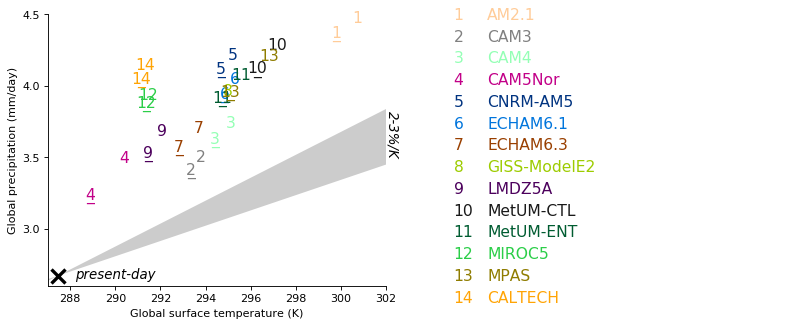

In [4]:
# plotting
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(12, 4.5), dpi=80, facecolor='w', edgecolor='k' )

ax = plt.subplot(1, 2, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.add_patch(Polygon([[273.15+14.3, 2.67], [273.15+14.3+20, 2.67*(1+0.02*20)], [273.15+14.3+20, 2.67*(1+0.03*20)]], True, alpha=0.4, facecolor='gray', edgecolor='none', linewidth=2))
ax.add_patch(Polygon([[273.15+14.3, 2.67], [273.15+14.3-20, 2.67*(1+0.02*-20)], [273.15+14.3-20, 2.67*(1+0.03*-20)]], True, alpha=0.4, facecolor='gray', edgecolor='none', linewidth=2))
plt.plot(273.15+14.3, 2.67, 'kx', ms=12, mew=3)  
for i in range(tm.nmod):
    if (np.isnan(ts_aqct[i])==False):
        plt.text(ts_aqct[i], pr_aqct[i], tm.modnumbers[i], ha='center', va='center', 
                 color=tm.modcolors[i], fontsize=14, fontweight='normal')
    if np.isnan(ts_ldct[i]).sum() == 0:        
        plt.text(ts_ldct[i], pr_ldct[i], tm.modnumbers[i], ha='center', va='center', 
                 color=tm.modcolors[i], fontsize=14, fontweight='normal')
        plt.text(ts_ldct[i], pr_ldct[i]-0.06, '_', ha='center', va='bottom', 
                 color=tm.modcolors[i], fontsize=14, fontweight='normal')
plt.xlim(287, 302); plt.xticks([288, 290, 292, 294, 296, 298, 300, 302])
plt.ylim(2.6, 4.5); plt.yticks([3.0, 3.5, 4.0 ,4.5])
plt.xlabel('Global surface temperature (K)')
plt.ylabel('Global precipitation (mm/day)')
plt.text(302, 3.75, '2-3%/K', fontsize=12, rotation=-90, fontstyle='italic'  )
plt.text(288.2, 2.65, 'present-day', fontsize=12, fontstyle='italic')

ax = plt.subplot(1, 2, 2)
plt.xlim(0, 1), plt.ylim(0, 1)
plt.axis('off')
for m in range(tm.nmod):
    plt.text(0.0, 1.06-0.08*np.float(tm.modnumbers[m]), tm.modnumbers[m], color=tm.modcolors[m], fontsize=14)
    plt.text(0.1, 1.06-0.08*np.float(tm.modnumbers[m]), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)

plt.tight_layout

plt.savefig('figs/corrigendumpaper_figure8.pdf')